<a href="https://colab.research.google.com/github/RFJC21/Supervised_Learning_House_Prices/blob/master/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Data science e data analsis: vamos analisar e visualizar os dados, para ver a correlacao que existe entre as variaveis, para criar um algoritmo que com base nas correlcoes entre as varias variaveis independentes, vai tentar prever os precos das casas

#import data from scikitlearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas_profiling 

boston_dataset=load_boston()

In [0]:
%matplotlib inline
type(boston_dataset)

sklearn.utils.Bunch

In [0]:
boston_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
#atributos dos dados
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [0]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
#um dos atribitos do object e "data"
type(boston_dataset.data)

numpy.ndarray

In [0]:
#ver quantas linhas e colunas
boston_dataset.data.shape

(506, 13)

In [0]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
#os prices estao no target
#prices in K Dollars
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [0]:
#Explroe data with Panda Dataframes, and create a dataframe
data=pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#add a column with the prices
data['PRICE']=boston_dataset.target


In [0]:
#top rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#quantas rows
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [0]:
#clean data
#ver valores nulos
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [0]:
#descricao da dagtaframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [0]:
#Visualize data com MatPlotLib

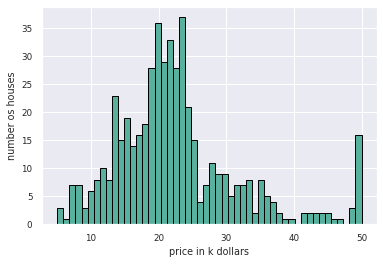

In [0]:
#Histograma com matplotlib
plt.hist(data['PRICE'],bins=50,ec='black',color='#58B19F')
plt.xlabel('price in k dollars')
plt.ylabel('number os houses')
plt.show()

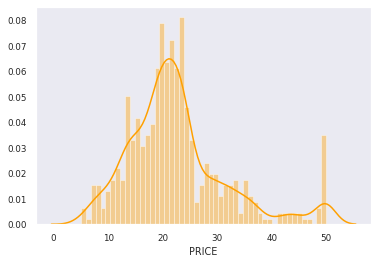

In [0]:
#histograma com seaborn
#linha e a PDF (Probability Density Function)
sns.distplot(data['PRICE'], bins=50,color='#FFA000')
plt.grid()
plt.show()

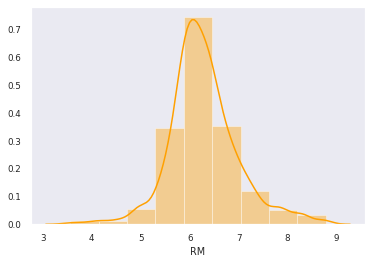

In [0]:
#histograma das divisoes da casa
sns.distplot(data['RM'], bins=9,color='#FFA000')
plt.grid()
plt.show()

In [0]:
#Media de quartos
data['RM'].mean()

6.284634387351787

In [0]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

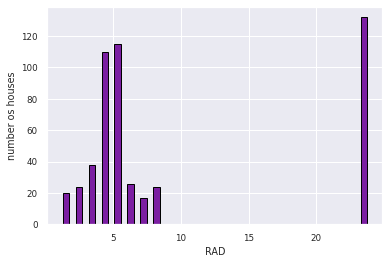

In [0]:
#Histograma com matplotlib da RAD feature, com os 24 valores unicos
plt.hist(data['RAD'],bins=24,ec='black',color='#7B1FA2', rwidth=0.5)
plt.xlabel('RAD')
plt.ylabel('number os houses')
plt.show()

In [0]:
#guardar os valores unicos para fazer o eixo dos x num bar chart
frequency=data['RAD'].value_counts()
frequency.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

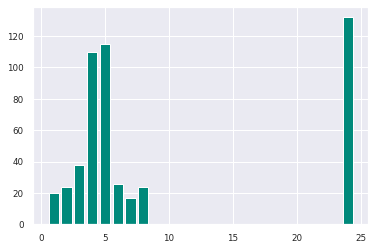

In [0]:
plt.bar(frequency.index,height=frequency, color='#00897b')
plt.show()

In [0]:
#quantas casas perto do rio?
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [0]:
#Descriptive statistics
#lets find the smallest, alrgest,mean and median
data['PRICE'].min()

5.0

In [0]:
data['PRICE'].max()

50.0

In [0]:
data['PRICE'].mean()

22.532806324110698

In [0]:
data['PRICE'].median()

21.2

In [0]:
#min of the all dataframe
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [0]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [0]:
#Tudo
#median is the 50%
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
####Correlation (entre -1 e 1)#######
######queremos a strength e a direction of the correlation######
#tem de ser uma DataFrame

In [0]:
#correlation price vs RM
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [0]:
#prices vs pupil teacher ratio
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [0]:
#correlation entre todas as variaveis
# this is the Pearson Correlation Coeficient
##Desvantagens##
#esta correlaao so e valida para variaveis continuas, e nao para binarias (1 ou 0); e nao implica obriatoriamente que relacao causa -> efeito; apenas para relacoes lineares
correlation= data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [0]:
#esta tabela tem valores simetricos, e so queremos metade
#Importar numpy

In [0]:
mask=np.zeros_like(data.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

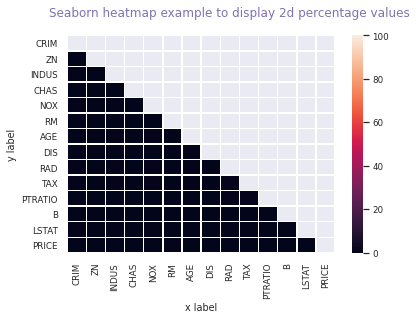

In [0]:
plt.figure()
plt.suptitle("Seaborn heatmap example to display 2d percentage values", color='m')
sns.set(font_scale=0.8)

ax = sns.heatmap(data.corr(),mask=mask, linewidths=.5, annot_kws={"size": 12}, vmin=0, vmax=100)
ax.set(xlabel='x label', ylabel='y label')

plt.show()

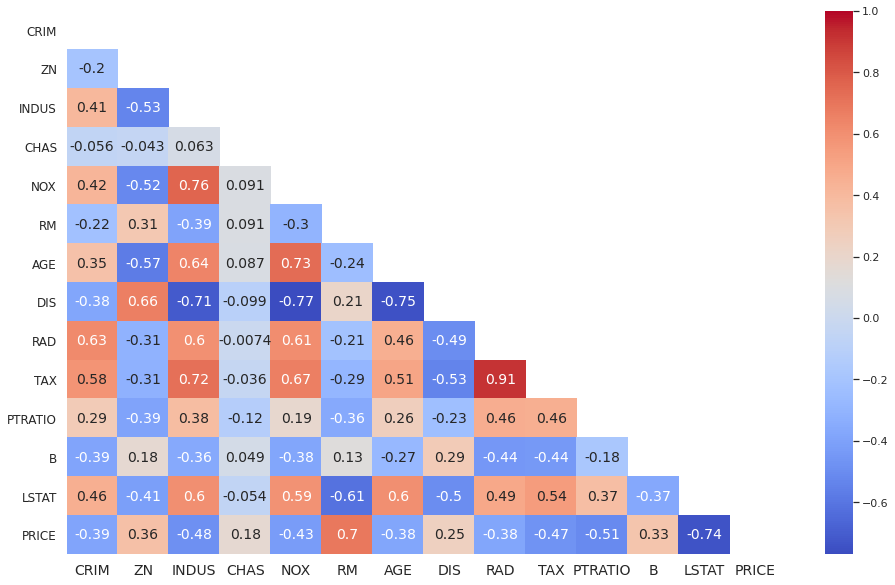

In [0]:
#Heat Map com matplotlib and seaborn
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, cmap="coolwarm",annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [0]:
#a correlacao com RAD nao e valida, pois esta variavel so assume valores de 0 e 1

In [0]:
#e importante para o nosso modelo excluir features (variaveis) que nao acrescentem valor (indices baixos)

In [0]:
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

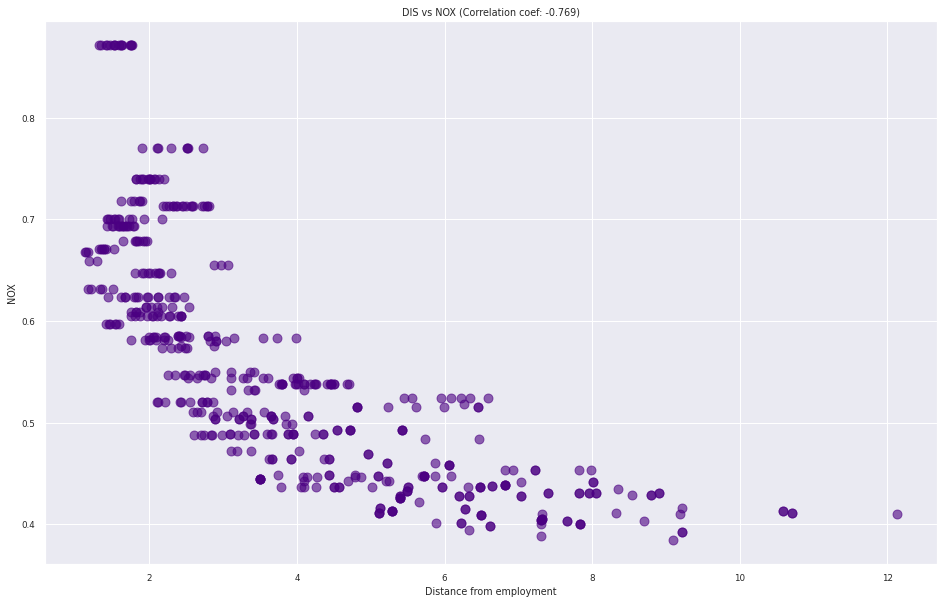

In [0]:
#sctatter plot between polution and distance com MATPLOTLIB
#and also the correlation coeficient no titulo, e mudar casas decimais

nox_dis_corr=round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(16,10))
plt.scatter(x=data['DIS'],y=data['NOX'], alpha=0.6,s=80, color='indigo')
plt.xlabel('Distance from employment')
plt.ylabel('NOX')
plt.title(f'DIS vs NOX (Correlation coef: {nox_dis_corr})')
plt.show()

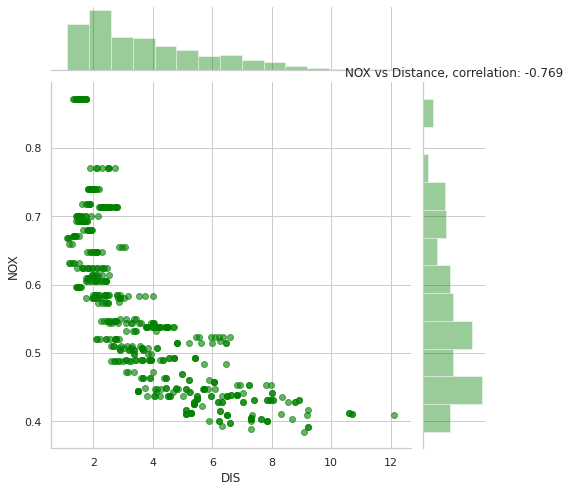

In [0]:
#sctatter plot and histogram between polution and distance com SEABORN
#and also the correlation coeficient no titulo, e mudar casas decimais
#o metudo set e para voltar as definicoes default
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, color='green',joint_kws={'alpha':0.6})
plt.title(f'NOX vs Distance, correlation: {nox_dis_corr}')
plt.show()

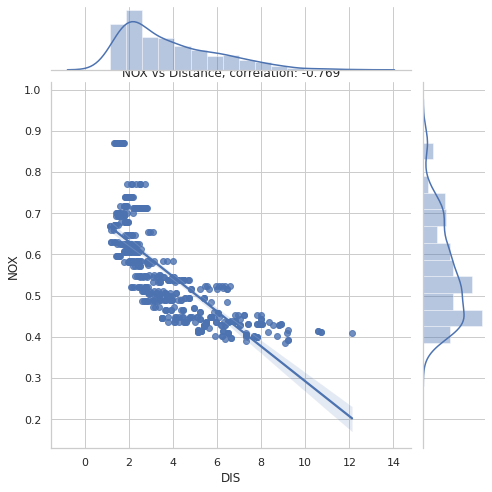

In [0]:
#jointplot com outros valores (KIND)
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, kind='reg')
plt.title(f'NOX vs Distance, correlation: {nox_dis_corr}')
plt.show()

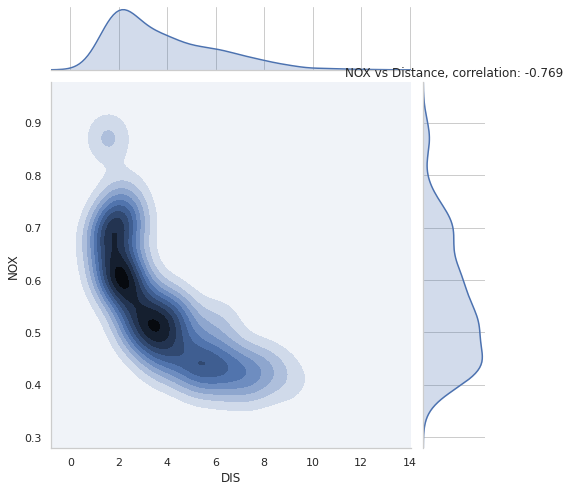

In [0]:
#jointplot com outros valores (KIND)
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, kind='kde')
plt.title(f'NOX vs Distance, correlation: {nox_dis_corr}')
plt.show()

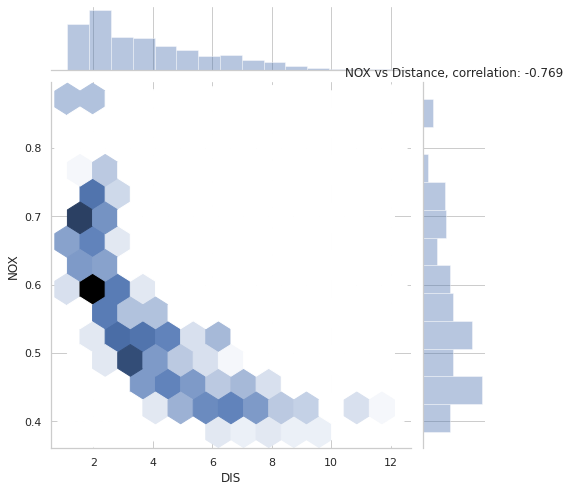

In [0]:
#jointplot com outros valores (KIND)
#scatter plot and histogram at the same time!
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, kind='hex')
plt.title(f'NOX vs Distance, correlation: {nox_dis_corr}')
plt.show()

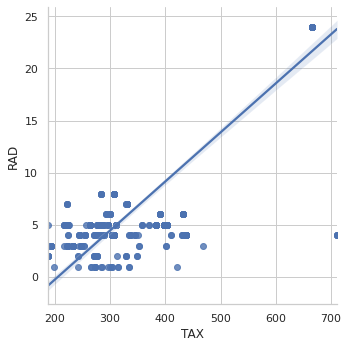

In [0]:
#Linear Regression plot between TAX and RAD, que tem o maior coeficient
#os pontos no canto superior direito estao a influenciar os resultados, incorretamente, pois tem outliers
sns.lmplot(x='TAX',y='RAD',data=data)
plt.show()

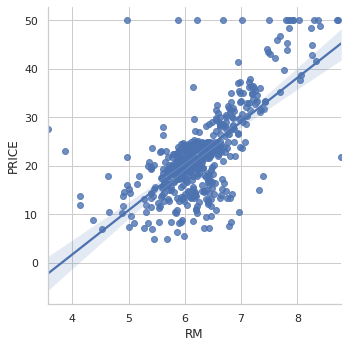

In [0]:
#Linear Regression plot between RM and PRICE, que tem o maior coeficient
#os pontos no canto superior direito estao a influenciar os resultados, incorretamente, pois tem outliers
sns.lmplot(x='RM',y='PRICE',data=data)
plt.show()

In [0]:
            ## LETS TRAIN OUR MODEL##
####### MULTIVARIABLE REGRESSION or Multiple Linear Regression#

#inear Regression: y= theta0 (intercept) + theta1*x1 + theta2*x2...
#Our case: PRICE = theta0 + theta1RM + theta2NOX + ...
# x-> explanatory variable (movie budgets)

In [0]:
#Step 1: divide data in trainning data and testing data, using Scikitlearn (from sklearn.model_selection import train_test_split)
#drop method: dataframe with all but price (axis=1 drop a column, 0 to drop a row)
#tuple unpacking

prices = data['PRICE']
features=data.drop('PRICE',axis=1)

#criar  variaveis para guardar os valores de treino e de testing
#test data is 20% of the total. ao fazer isto, o modelo baralha os dados e divide

x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size=0.2, random_state=10 )

In [0]:
# % trainning data
len(x_train)/len(features)

0.7984189723320159

In [0]:
# Step 2: Running the Regression
# from sklearn.linear_model import LinearRegression
# Create Regression Object
# This will train our model

regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Step 3: make some predictions of the sign of theta1, theta2...
# RM: +; NOX: -; PTRATIO: -; CRIME: -; DIS: -; LSTAT: -; CHAS: +

print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])


Intercept:  36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [0]:
#this means: PRICE= 36.5 + 3.1RM -16.3NOX + ...
#this means: the increase of rooms by 1 will increase the price in 3.1kdollars

In [0]:
# r_squared for trainning and test data
print('Trainning data r_squared: ', regr.score(x_train,y_train))
print('Test data r_squared: ', regr.score(x_test,y_test))

Trainning data r_squared:  0.750121534530608
Test data r_squared:  0.6709339839115651


In [0]:
#e mais baixo do test data PORQUE o nosso modelo ainda nao foi calculado (ainda nao viu) os nossos dados de teste!
# Step 4: Deploy and Evaluate our Model
# Evaluate: r_squared; p-values (significance); V.I.F (to test Multicollinearity); BIC(Baysian Information Criterion) (to drop some features/explanatory variables) 

In [0]:
# Step 5?? Data Transformations
# histograma com muitos dados num dos lados -> skew
# como o PRICE tem muitos valores a direito no histogram, vamos aplicar "Log Transformation" que afeta mais estes, os maiores, do que os restantes
# skew normal distribution=0
data['PRICE'].skew()

1.1080984082549072

In [0]:
# Apply Log to PRICE
log_prices=np.log(data['PRICE'])
log_prices.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [0]:
log_prices.skew()

-0.33032129530987864

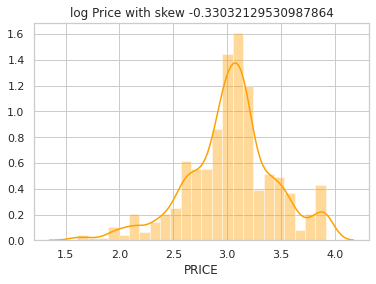

In [0]:
# histograma do log
sns.distplot(log_prices,color='#FFA000')
plt.title(f'log Price with skew {log_prices.skew()}')
plt.show()

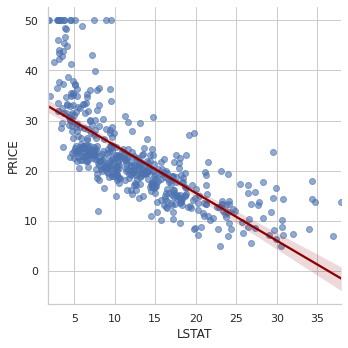

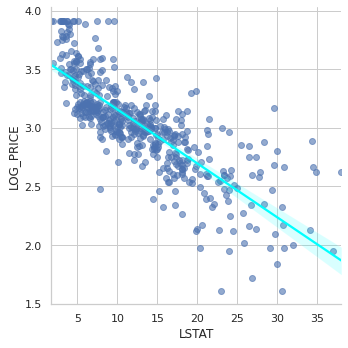

In [0]:
# normal vs log
sns.lmplot(x='LSTAT',y='PRICE',data=data, scatter_kws={'alpha':0.6}, line_kws={'color': 'darkred'})

# e preciso criar outra DataFrame e uma nova coluna
transformed_data = features
transformed_data['LOG_PRICE']= log_prices

sns.lmplot(x='LSTAT',y='LOG_PRICE',data=transformed_data, scatter_kws={'alpha':0.6}, line_kws={'color': 'cyan'})
plt.show()

In [0]:
# STEP 1 Again: vamos aplicar a nossa Linear Regression aos Log_Prices -> Log Linear Model
prices = np.log(data['PRICE'])
features=data.drop('PRICE',axis=1)

x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size=0.2, random_state=10 )

regr=LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: ', regr.intercept_)
print('Trainning data r_squared: ', regr.score(x_train,y_train))
print('Test data r_squared: ', regr.score(x_test,y_test))
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Intercept:  4.059943871775192
Trainning data r_squared:  0.7930234826697583
Test data r_squared:  0.7446922306260735


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [0]:
# Com isto -> r-squared maior; reduced sked in target; better fit
# para saber o real valor em Dollars, temos de aplicar o reverse do log aos coeficientes!!!!
# exemplo CHAS
np.e**0.080331

1.0836456950439142

In [0]:
# Calcular p-value (significance)
# p-value < 0.05 -> Statisticaly Significante
# p-value > 0.05 -> Statisticaly Not Significant

# import Stats: (import statsmodels.api as sm)

### p-values and Evaluating Coefficients ###

In [0]:
# add an intercept
# OLS: Ordinry Least Squares
x_incl_const=sm.add_constant(x_train)

model=sm.OLS(y_train,x_incl_const)

results=model.fit()

results.pvalues

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64

In [0]:
#colocar os pvalues numa DataFrame
pd.DataFrame({'coef: ':results.params, 'p-values: ':round(results.pvalues,5)})

#Age and INDUS are NOT SIGNIFICANT

,coef:,p-values:
const,4.059944,0.00000
CRIM,-0.010672,0.00000
ZN,0.001579,0.00861
INDUS,0.002030,0.44454
CHAS,0.080331,0.03824
NOX,-0.704068,0.00003
RM,0.073404,0.00011
AGE,0.000763,0.20917
DIS,-0.047633,0.00000
RAD,0.014565,0.00000


In [0]:
# Test for Multicollinearity -> quando 2 ou mais variaveis estao fortemente corelacionadas, e assi grande variabilidade no Theta(n)
# Para ver isto -> VIF (Variance Inflation Factor)
# VIF>10 -> Problematic
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# dataframe.values returns an ndarray
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

1.7145250443932485

In [0]:
#para calcular para todas as features, vamos fazer um loop e guardar os VIF numa lista
#saber quantas colunas temos
len(x_incl_const.columns)
x_incl_const.shape

(404, 14)

In [0]:
vif_list=[]
for i in range(x_incl_const.shape[1]):
    vif_list.append(variance_inflation_factor(exog=x_incl_const.values,exog_idx=i))
print(vif_list)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674638, 1.0788133385000578, 4.410320817897635, 1.8404053075678575, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514064, 1.3386713255364717, 2.812544292793036]


In [0]:
#colocar a list numa DataFrame
pd.DataFrame({'coef_name :':x_incl_const.columns,'vif: ': np.round(vif_list,2)})

,coef_name :,vif:
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [0]:
 ## MODEL SIMPLIFICATION ##
#Lets make our model simplier (simple is better than complex :) )
# we can eliminate some explanatory variables (ROM...)
# For this we use BIC -> test 2 different models, and we chose the lower value

#Try with and without INDUS feature (low correleation and high p-value)

In [0]:
# Original Model
x_incl_const=sm.add_constant(x_train)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()
original_coef=pd.DataFrame({'coef: ':results.params, 'p-values: ':round(results.pvalues,5)})

#BIC
print('BIC: ',results.bic)
print('r_squared:', results.rsquared)

BIC:  -139.74997769478875
r_squared: 0.7930234826697583


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# 2nd Model with reduced features (INDUS)
# Original Model
x_incl_const=sm.add_constant(x_train)
#tirar uma coluna
x_incl_const=x_incl_const.drop(['INDUS'],axis=1)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()
second_model_coef=pd.DataFrame({'coef: ':results.params, 'p-values: ':round(results.pvalues,5)})

#BIC
print('BIC: ',results.bic)
print('r_squared:', results.rsquared)

BIC:  -145.1450885559114
r_squared: 0.7927126289415162


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# 3rd Model with reduced features (INDUS and AGE)
# Original Model
x_incl_const=sm.add_constant(x_train)
#tirar uma coluna
x_incl_const=x_incl_const.drop(['INDUS','AGE'],axis=1)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()
third_model_coef=pd.DataFrame({'coef: ':results.params, 'p-values: ':round(results.pvalues,5)})

#BIC
print('BIC: ',results.bic)
print('r_squared:', results.rsquared)

BIC:  -149.49934294224678
r_squared: 0.7918657661852815


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# Conclusion: BIC3 < BIC2 < BIC1, BIC3 better

In [0]:
#List of our frames
frames=[original_coef,second_model_coef,third_model_coef]
pd.concat(frames, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,coef:,p-values:,coef:,p-values:,coef:,p-values:
AGE,0.000763,0.20917,0.000766,0.20702,NaN,NaN
B,0.000516,0.00001,0.000511,0.00001,0.000518,0.00001
CHAS,0.080331,0.03824,0.082795,0.03203,0.086449,0.02492
CRIM,-0.010672,0.00000,-0.010721,0.00000,-0.010702,0.00000
DIS,-0.047633,0.00000,-0.049394,0.00000,-0.052692,0.00000
INDUS,0.002030,0.44454,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.00000,-0.031262,0.00000,-0.030271,0.00000
NOX,-0.704068,0.00003,-0.673365,0.00003,-0.616448,0.00008
PTRATIO,-0.034795,0.00000,-0.034126,0.00000,-0.033481,0.00000
RAD,0.014565,0.00000,0.014014,0.00000,0.013743,0.00000


In [0]:
# Residuals (y-y^) and Residual Plots -> Pois assumimos algumas coisas, como: o nosso modelo como linear
# r= observed target value - our predicted value from model

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


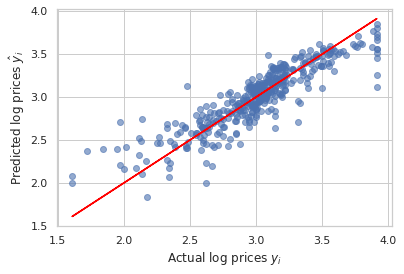

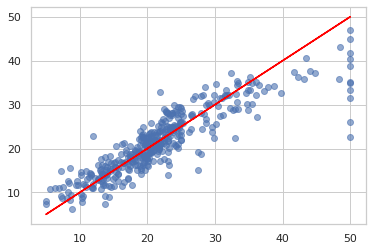

CPU times: user 630 ms, sys: 189 ms, total: 820 ms
Wall time: 594 ms


In [0]:
%%time
# Modified Model
prices = np.log(data['PRICE'])
features=data.drop(['PRICE','INDUS','AGE'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size=0.2, random_state=10 )

# Using Stats Model
x_incl_const=sm.add_constant(x_train)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()

# Residuals (y-y^)
#residuals=y_train-results.fittedvalues
#residuals
results.resid

# Plot
corr= round(y_train.corr(results.fittedvalues),2)
corr
plt.scatter(x=y_train,y=results.fittedvalues, alpha=0.6)
# perfect prediction
plt.plot(y_train,y_train,color='red')

#log prices
plt.xlabel('Actual log prices $y _i$')
plt.ylabel('Predicted log prices $\hat y _i$')
plt.show()

# normal prices
plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues, alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,color='red')
plt.show()

In [0]:
%%time
## Making Predictions with our Model##
#MSE (Mean Squared Error) MSE=(1/n)Sumatorio (y-y^)^2
#MSE very sensitive with outliers
# Maior R_Squared -> Melhor fit

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


In [0]:
%%time
#MSE and R-Suared
reduced_log_mse= round(results.mse_resid,3)
print(reduced_log_mse)

reduced_log_rsquared=round(results.rsquared,3)
print(reduced_log_rsquared)

0.035
0.792
CPU times: user 1.51 ms, sys: 103 µs, total: 1.62 ms
Wall time: 2.22 ms


In [0]:
##### HOW DO WE MAKE A PREDICITON?? ####
# Estimated value
# Range
# Desvio padrao or standard deviation (upper and lower): distancia do mean ao ponto -> RMSE=rsquare(MSE)

In [0]:
# RMSE
RMSE_reduced_log= np.sqrt(reduced_log_mse)
RMSE=RMSE_reduced_log
print('RMSE: ',RMSE_reduced_log)

RMSE:  0.18708286933869708


In [0]:
%%time
# For a House = 30 kdollars, calculate de upper and lower bound, for a 95% prediction interval
# 1 sd= 65%
# 2 sd= 95%
print('1 standard deviation: ', RMSE)
print('2 standard deviation: ', 2*RMSE)
upper_bound=np.log(30) + 2*RMSE
print('upper bound in log prices is: ',upper_bound)
print('upper bound in normal prices is: ',np.e**upper_bound)

lower_bound=np.log(30) - 2*RMSE
print('lower bound in log prices is: ',lower_bound)
print('lower bound in normal prices is: ',np.e**lower_bound)

1 standard deviation:  0.18708286933869708
2 standard deviation:  0.37416573867739417
upper bound in log prices is:  3.7753631203395495
upper bound in normal prices is:  43.61334233239937
lower bound in log prices is:  3.0270316429847615
lower bound in normal prices is:  20.635886906824155
CPU times: user 2.86 ms, sys: 0 ns, total: 2.86 ms
Wall time: 3.56 ms


In [0]:
G

NameError: ignored